# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [4]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [6]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [9]:
# Create a Beautiful Soup Object

# HTML of the page
html = browser.html

# Create a BeautifulSoup object
soup_obj = soup(html, 'html.parser')


In [13]:
# Extract all rows of data
# Table element on the webpage
table = soup_obj.find('table')

# Create an empty list 
data_rows = []

# Iterate through the rows 
for row in table.find_all('tr'):
    # Empty dictionary for each row of data
    row_data = {}
    
    # Iterate through the cells in the row
    cells = row.find_all('td')
    
    if cells:
        # Extract data from the cells and store it in a dictionary
        row_data['Property'] = cells[0].text.strip()
        row_data['Value'] = cells[1].text.strip()
        
        # Append the dictionary 
        data_rows.append(row_data)

# Print the extracted data
for row in data_rows:
    print(row)


{'Property': '2', 'Value': '2012-08-16'}
{'Property': '13', 'Value': '2012-08-17'}
{'Property': '24', 'Value': '2012-08-18'}
{'Property': '35', 'Value': '2012-08-19'}
{'Property': '46', 'Value': '2012-08-20'}
{'Property': '57', 'Value': '2012-08-21'}
{'Property': '68', 'Value': '2012-08-22'}
{'Property': '79', 'Value': '2012-08-23'}
{'Property': '112', 'Value': '2012-08-27'}
{'Property': '114', 'Value': '2012-08-28'}
{'Property': '123', 'Value': '2012-08-29'}
{'Property': '134', 'Value': '2012-08-30'}
{'Property': '145', 'Value': '2012-08-31'}
{'Property': '156', 'Value': '2012-09-01'}
{'Property': '163', 'Value': '2012-09-02'}
{'Property': '170', 'Value': '2012-09-03'}
{'Property': '171', 'Value': '2012-09-04'}
{'Property': '172', 'Value': '2012-09-05'}
{'Property': '173', 'Value': '2012-09-06'}
{'Property': '175', 'Value': '2012-09-08'}
{'Property': '176', 'Value': '2012-09-10'}
{'Property': '177', 'Value': '2012-09-11'}
{'Property': '178', 'Value': '2012-09-12'}
{'Property': '179', 

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [14]:

# Extract tables from the webpage
tables = pd.read_html(url)

# Table1: the first one on the page
table1 = tables[0]

# Set the columns
table1.columns = ["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"]


table1.head()


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [15]:
# Examine the data type 
print(table1.dtypes)

# Convert all columns to "object" 
table1 = table1.astype(object)


id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object


In [16]:
# Change data types for data analysis

table1['terrestrial_date'] = pd.to_datetime(table1['terrestrial_date'])
table1['sol'] = table1['sol'].astype(int)
table1['ls'] = table1['ls'].astype(float)
table1['month'] = table1['month'].astype(int)
table1['min_temp'] = table1['min_temp'].astype(float)
table1['pressure'] = table1['pressure'].astype(float)


print(table1.dtypes)



id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                         float64
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [19]:
# Count of each unique month
month_counts = table1['month'].value_counts().sort_index()
print(month_counts)


1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64


In [20]:
# 2. How many Martian days' worth of data are there?

# Count of unique Martian days 
sol_count = table1['sol'].nunique()
print(sol_count)


1867


In [21]:
3. What is the average low temperature by month?
# The average minimum daily temperature for each month
monthly_avg_min_temp = table1.groupby('month')['min_temp'].mean().reset_index()


print(monthly_avg_min_temp)


Object `month` not found.
    month   min_temp
0       1 -77.160920
1       2 -79.932584
2       3 -83.307292
3       4 -82.747423
4       5 -79.308725
5       6 -75.299320
6       7 -72.281690
7       8 -68.382979
8       9 -69.171642
9      10 -71.982143
10     11 -71.985507
11     12 -74.451807


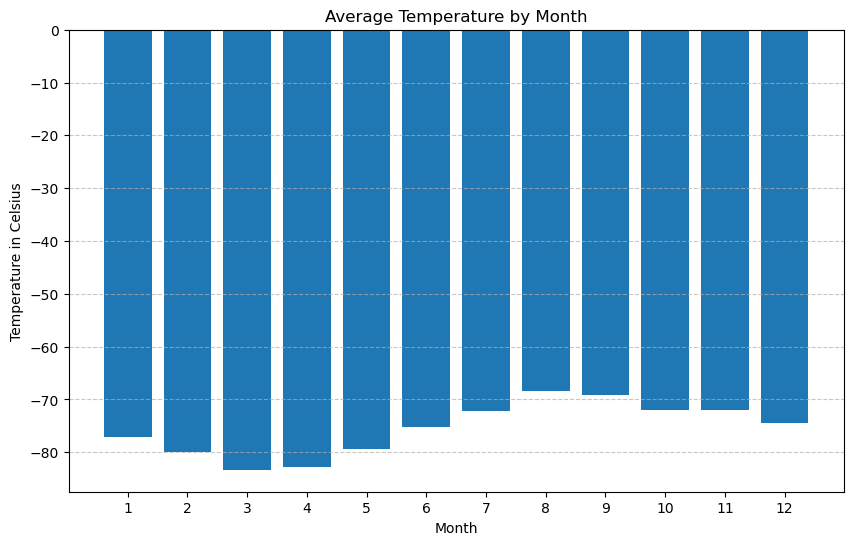

In [25]:
# Plot the average temperature by month

monthly_avg_temperature = table1.groupby('month')['min_temp'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(monthly_avg_temperature.index, monthly_avg_temperature, tick_label=monthly_avg_temperature.index)
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.title('Average Temperature by Month' )
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


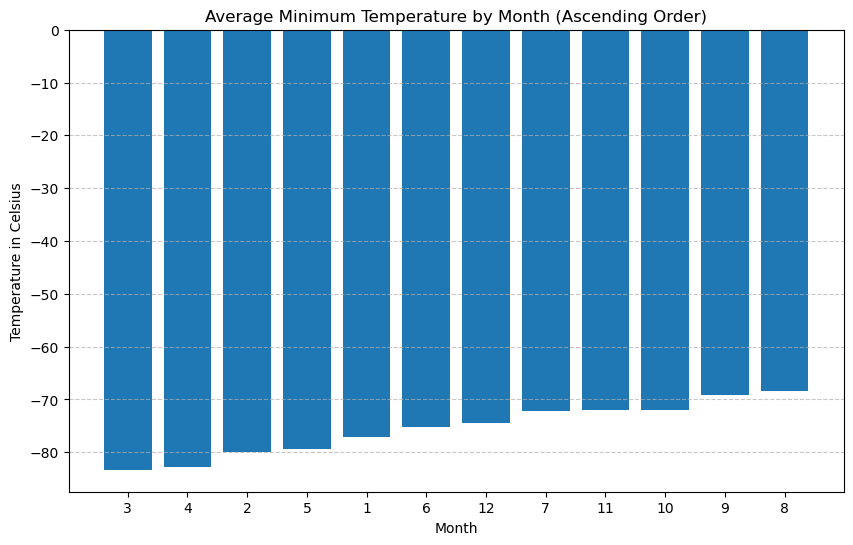

In [31]:
# Identify the coldest and hottest months in Curiosity's location

# Sort the monthly_avg_min_temp  in ascending order
monthly_avg_min_temp_sorted = monthly_avg_min_temp.sort_values(ascending=True)

# Get the sorted list of months
sorted_months = monthly_avg_min_temp_sorted.index

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, 13), monthly_avg_min_temp_sorted, tick_label=[str(month) for month in sorted_months])
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.title('Average Minimum Temperature by Month (Ascending Order)')
plt.xticks(range(1, 13))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()




In [32]:
# 4. Average pressure by Martian month

monthly_avg_pressure = table1.groupby('month')['pressure'].mean().reset_index()


print(monthly_avg_pressure)


    month    pressure
0       1  862.488506
1       2  889.455056
2       3  877.322917
3       4  806.329897
4       5  748.557047
5       6  745.054422
6       7  795.105634
7       8  873.829787
8       9  913.305970
9      10  887.312500
10     11  857.014493
11     12  842.156627


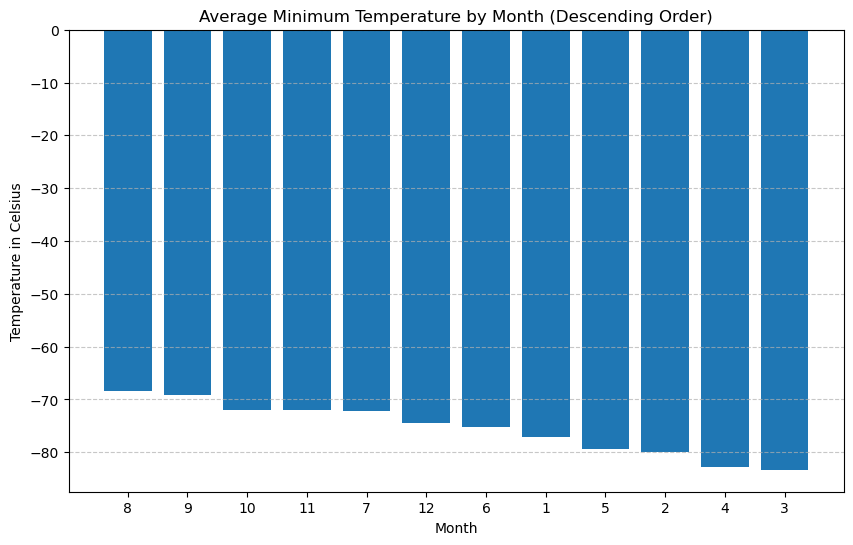

In [33]:
# Sort the monthly_avg_min_temp 
monthly_avg_min_temp_sorted = monthly_avg_min_temp.sort_values(ascending=False)

# Get the sorted list of months
sorted_months = monthly_avg_min_temp_sorted.index

# Bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, 13), monthly_avg_min_temp_sorted, tick_label=[str(month) for month in sorted_months])
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.title('Average Minimum Temperature by Month (Descending Order)')
plt.xticks(range(1, 13))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()



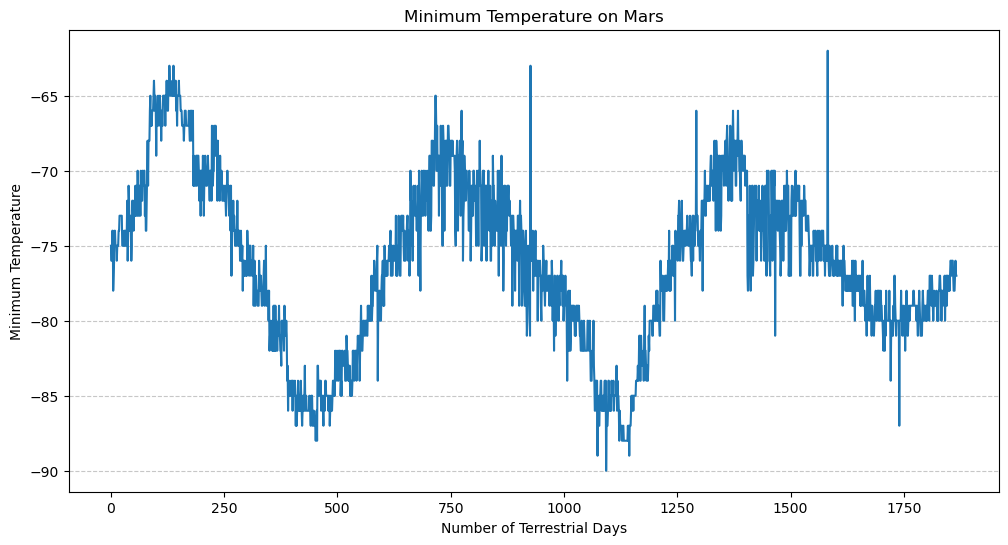

In [51]:
# Calculate the number of terrestrial days
terrestrial_days = range(len(table1))

# Plot the data 
plt.figure(figsize=(12, 6))
plt.plot(terrestrial_days, table1['min_temp'])
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature')
plt.title('Minimum Temperature on Mars')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [38]:
# Write the data to a CSV

table1.to_csv('mars_data.csv', index=False)


In [52]:
browser.quit()